In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv('drug200.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


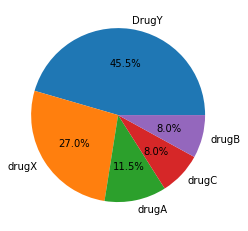

In [ ]:
plt.pie(df['Drug'].value_counts(),labels=list(df['Drug'].value_counts().keys()),autopct='%2.1f%%')
plt.show()

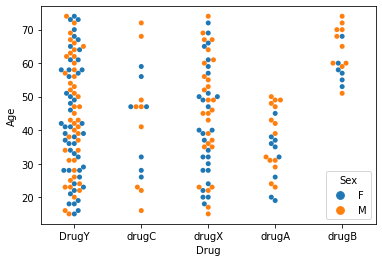

In [ ]:
sns.swarmplot(x='Drug',y='Age',hue='Sex',data=df)

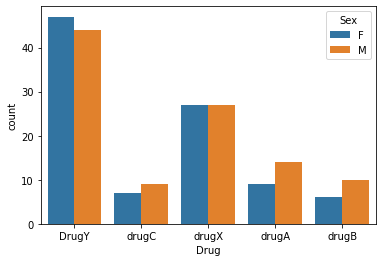

In [ ]:
sns.countplot(x='Drug',hue='Sex',data=df)

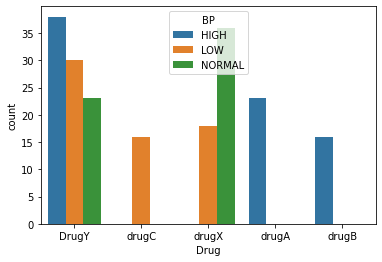

In [ ]:
sns.countplot(x='Drug',hue='BP',data=df)

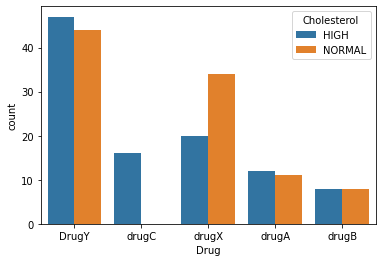

In [ ]:
sns.countplot(x='Drug',hue='Cholesterol',data=df)

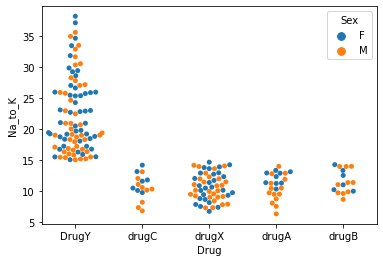

In [ ]:
sns.swarmplot(x='Drug',y='Na_to_K',hue='Sex',data=df)

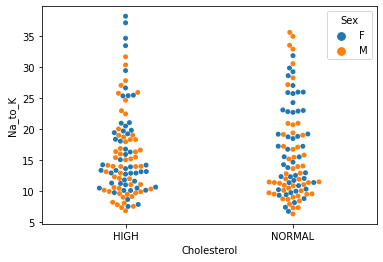

In [ ]:
sns.swarmplot(x='Cholesterol',y='Na_to_K',hue='Sex',data=df)

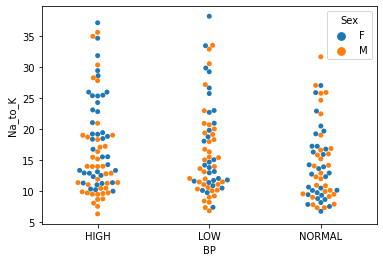

In [ ]:
sns.swarmplot(x='BP',y='Na_to_K',hue='Sex',data=df)

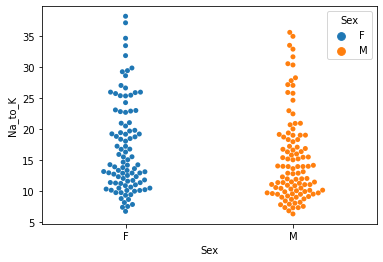

In [ ]:
sns.swarmplot(x='Sex',y='Na_to_K',hue='Sex',data=df)

In [ ]:
Lab=LabelEncoder()
for column in df.columns:
  if(df[column].dtype=='object'):
    df[column]=Lab.fit_transform(df[column])

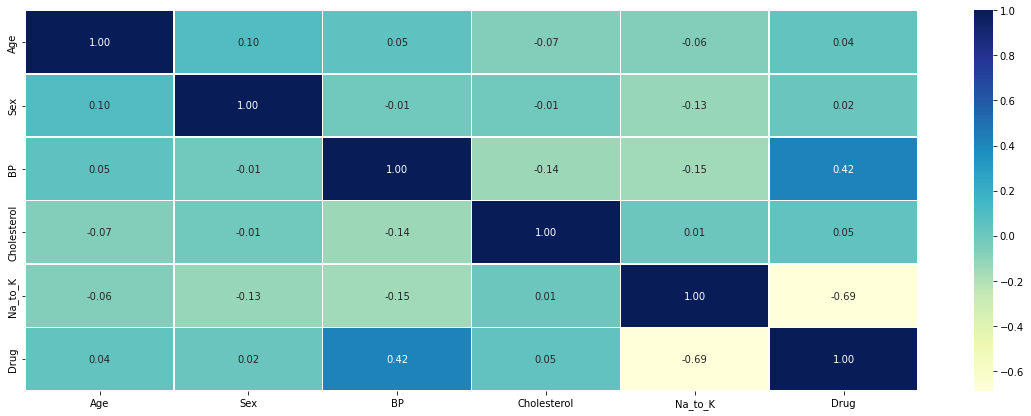

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [ ]:
df[df.columns[0:]].corr()['Drug'][:].sort_values(ascending=False)

Drug           1.000000
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Na_to_K       -0.689051
Name: Drug, dtype: float64

In [ ]:
x=df.drop(['Drug'],axis=1)
y=df['Drug']

In [ ]:
Feature=SelectKBest(k='all')

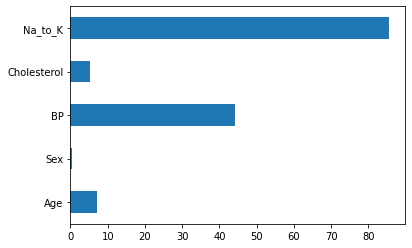

In [ ]:
Feature.fit(x,y)
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [ ]:
top=pd.Series(Feature.scores_,index=x.columns).nlargest(4).keys()

In [ ]:
x=df[list(top)]

In [ ]:
Extra=ExtraTreesClassifier(n_estimators=7)
Forest=RandomForestClassifier(n_estimators=7)
Adaboost=AdaBoostClassifier(n_estimators=7)
Tree=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=25)
Support=SVC(gamma='auto')
LDA=LinearDiscriminantAnalysis()
LGB=LGBMClassifier()
XGB=XGBClassifier()
LR=LogisticRegression()
Adaboost=AdaBoostClassifier()
GNB=GaussianNB()
BNB=BernoulliNB()

In [ ]:
Algo=[Extra,Forest,Adaboost,Tree,KNN,Support,LDA,LGB,XGB,LR,GNB,BNB]
Algorithm_name=["Extra","Forest","Adaboost","Tree","KNN","Support","LDA","LGB","XGB","LR","GNB","BNB"]

In [ ]:
Score=[]
Average=[]
for i in Algo:
  cv_score=cross_val_score(i,x,y,cv=5)
  Score.append(cv_score)
  Average.append(cv_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Scores=pd.DataFrame(Score)
Algorithm_name=pd.DataFrame(Algorithm_name,columns=['Algorithms'])
Average=pd.DataFrame(Average,columns=['Averages'])

In [ ]:
Table=pd.concat([Algorithm_name,Scores],axis=1)
Table=pd.concat([Table,Average],axis=1)

In [ ]:
Table

,Algorithms,0,1,2,3,4,Averages
0,Extra,0.975,0.975,0.950,0.900,0.900,0.940
1,Forest,1.000,1.000,1.000,0.900,0.975,0.975
2,Adaboost,0.850,0.825,0.850,0.825,0.825,0.835
3,Tree,1.000,1.000,1.000,0.925,1.000,0.985
4,KNN,0.700,0.650,0.675,0.625,0.600,0.650
5,Support,0.650,0.725,0.750,0.625,0.500,0.650
6,LDA,0.925,0.975,0.900,0.875,0.850,0.905
7,LGB,0.975,1.000,1.000,0.900,1.000,0.975
8,XGB,1.000,1.000,0.975,0.900,1.000,0.975
9,LR,0.925,0.850,0.850,0.850,0.975,0.890


In [ ]:
Best_Algo=Algo[list(Table['Averages']).index(max(list(Table['Averages'])))]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
Best_Algo.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
Best_Algo.score(xtest,ytest)

1.0

In [ ]:
pred=Best_Algo.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
from sklearn.ensemble import StackingClassifier
Algorithm_name=[("Extra",Extra),("Forest",Forest),("Adaboost",Adaboost),("Tree",Tree),("KNN",KNN),("Support",Support),("LDA",LDA),("LGB",LGB),("XGB",XGB),("LR",LR),("GNB",GNB),("BNB",BNB)]
Stacking=StackingClassifier(Algorithm_name,final_estimator=LGB)

In [ ]:
Stacking.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(estimators=[('Extra', ExtraTreesClassifier(n_estimators=7)),
                               ('Forest',
                                RandomForestClassifier(n_estimators=7)),
                               ('Adaboost', AdaBoostClassifier()),
                               ('Tree', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier(n_neighbors=25)),
                               ('Support', SVC(gamma='auto')),
                               ('LDA', LinearDiscriminantAnalysis()),
                               ('LGB', LGBMClassifier()),
                               ('XGB', XGBClassifier()),
                               ('LR', LogisticRegression()),
                               ('GNB', GaussianNB()), ('BNB', BernoulliNB())],
                   final_estimator=LGBMClassifier())

In [ ]:
Stacking.score(xtest,ytest)

1.0